<a href="https://colab.research.google.com/github/nhhoang231/LogisticRegression-/blob/master/ClassifierModel_Resolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Kiến thức cơ bản
Đây là những bài tập giúp bạn hiểu kiến thức cơ bản. Nếu bạn đọc chỉ muốn thực hành thông qua các package có sẵn có thể bỏ qua và làm part II.
## 1. Logistic regression
**Câu 1:** Hãy viết hàm số tính biểu diễn kết quả của hàm sigmoid biết véc tơ hệ số $\mathbf{w}$ và véc tơ đầu vào $\mathbf{x}$ (Khi viết véc tơ mà không nói gì thêm thì ta hiểu đó là véc tơ cột).

_gợi ý: Công thức của hàm sigmoid như bên dưới:_

$$\sigma(\mathbf{x}) = f(\mathbf{w^Tx}) = \frac{1}{1+e^{\mathbf{w^{T}x}}}$$

**Câu trả lời:**

In [ ]:
import numpy as np

w = np.array([1, 2, 4])
x = np.array([5, 2, 3])

# Viết hàm sigmoid bên dưới
def sigmoid(w, x):
    return 1/(1+np.exp(np.dot(w, x)))

sigmoid(w, x)

7.582560422162385e-10

**Câu 2:** Hàm mất mát của mô hình logistic regression là gì?

_gợi ý: Phương trình hàm loss function như bên dưới:_

$$\mathcal{L}(\mathbf{w}|\mathbf{X}, \mathbf{y}) = \sum_{i = 1}^{N} [y_i\log{z_i} + (1-y_i)\log{(1-z_i)}]$$

_với_ $z_i = \sigma(\mathbf{x_i}) = f(\mathbf{w^Tx})$

**Câu trả lời:**

In [ ]:
X = np.array([[1., 2.], 
              [2., 1.],
              [3., 4.],
              [1., 5.],
              [2., 3.]])

y = np.array([0., 0., 1., 1., 1.])
w = np.random.randn(2)

# Viết hàm loss function bên dưới
def _loss(X, y, w):
    loss = 0
    for i in range(X.shape[0]):
        xi = X[i, :]
        zi = sigmoid(w, xi)
        yi = y[i]
        loss_i = yi*np.log(zi) + (1-yi)*(1-np.log(zi))
        loss += loss_i
    return loss

_loss(X, y, w)

2.0817934741236375

**Câu 3:** Viết hàm gradient descent của loss function $\mathcal{L}(\mathbf{w}|\mathbf{x_i},y_i)$

_gợi ý: Đạo hàm của hàm loss function tại điểm (xi, yi) như sau_

$$\frac{\partial \mathcal{L}(\mathbf{w}|\mathbf{x_i}, y_i)}{\partial \mathbf{w}} = (z_i-y_i)\mathbf{x_i}$$

In [ ]:
w = np.random.randn(2)
xi = np.array([1.0, 2.0])
yi = np.array([1])

def _gradient(w, x, y):
    zi = sigmoid(w, x)
    grad = (zi-y)*x
    return grad

_gradient(w, xi, yi)

array([-0.1634447 , -0.32688939])

**Câu 4:** Xây dựng thuật toán cập nhật gradient descent theo logistic regression

_gợi ý: Thuật toán sẽ là một vòng lặp đi qua các điểm dữ liệu. Tại mỗi điểm dữ liệu ta sẽ:_

_Bước 1: Tính gradient descent của hàm loss function tại điểm dữ liệu đó_

_Bước 2: Cập nhật lại vào nghiệm w theo phương trình_

$$\mathbf{w} := \mathbf{w} - \eta (z_i-y_i)\mathbf{x_i}$$

_Bước 3: Tính lại hàm loss function. Kiểm tra điều kiện dừng nếu hàm loss function tăng hơn so với trước_

In [ ]:
# Bước 1:
w_init = np.random.randn(2)
lr = 0.01
stop = 0.0001
w = w_init
diff_loss = 0
losses = []
w_saved = []
print_evr = 20
max_iter = 100
count = 0
# Bước 2:
while count < max_iter:
    ids = np.random.permutation(X.shape[0])
    for i in ids:
        xi = X[i, :]
        yi = y[i]
        zi = sigmoid(w, xi)
        grad = _gradient(w, xi, yi)
        w += -lr*(zi-yi)*xi
        # Bước 3:
        loss_i = _loss(X, y, w)
        losses.append(loss_i)
        w_saved.append(w)
        count += 1
        if (count % print_evr == 0) & (count != 0):
            diff_loss = loss_i - losses[-print_evr]
            epoch = int(count/X.shape[0])
            print('loss function at epoch : {}; step {}: {}; weight vector: {}'.format(epoch, count, loss_i, w))
            if (diff_loss > stop) | (count > max_iter):
                break

loss function at epoch : 4; step 20: 1.7091397448820358; weight vector: [-1.11592278  0.16467091]
loss function at epoch : 8; step 40: 1.6884671649153442; weight vector: [-1.17874116  0.18576076]
loss function at epoch : 12; step 60: 1.6674173585910017; weight vector: [-1.24292581  0.2070765 ]
loss function at epoch : 16; step 80: 1.6457947463371276; weight vector: [-1.30869237  0.22873708]
loss function at epoch : 20; step 100: 1.6307163259190067; weight vector: [-1.37708966  0.24767552]


# Appendix. Bài tập thực hành

Hồi qui mô hình sử dụng sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept = True, max_iter = 10000)

model.fit(X, y)

print(model.intercept_, model.coef_)

[-0.45448122] [[-0.17062027  0.56195216]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Kết quả thu được sẽ khác so với thuật toán Gradient descent do LogisticRegression của Sklearn luôn có thành phần kiểm soát (regularization).

# II. Xây dựng mô hình logistic regression
**Câu 5:** Đọc dữ liệu về phân loại nợ home equity. Hãy liệt kê định dạng biến và thống kê mô tả các biến trong bộ dữ liệu này.

_gợi ý: sử dụng pandas.read_csv() và dataframe.describe()_

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

drive.mount('content')

path = 'content/My Drive/Classifier'
os.chdir(path)
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at content
BTVN_buoi2	   ClassifierModel_Practice.ipynb  hmeq.csv
ClassifierML.pptx  ClassifierModel_Resolved.ipynb


**Câu trả lời:**

In [ ]:
# Đọc dữ liệu
dataset = pd.read_csv('hmeq.csv', header = 0, sep = ',')
# In ra kích thước của dataset
print(dataset.shape)
# In ra định dạng các trường
print(dataset.dtypes)
# Thống kê mô tả các trường
dataset.describe()

(5960, 13)
BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Câu 6:** Vẽ biểu đồ histogram (biểu đồ phân chia thành các bins đều nhau) phân phối các biến liên tục và biểu đồ barchart (biểu đồ cột) đếm số lượng quan sát đối với biến category.

_gợi ý: Đầu tiên xây dựng các hàm visualization biểu đồ histogram và barchar; Sau đó sử dụng vòng for duyệt qua toàn bộ các trường của bảng để kiểm tra các định dạng trường là gì và visualize biểu đồ tương ứng_


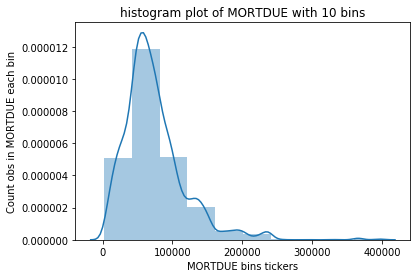

In [ ]:
import seaborn as sns
import logging
logging.getLogger("seaborn").setLevel(logging.CRITICAL)
# Suppress warning
import warnings

import warnings
warnings.filterwarnings("ignore")

# Biểu đồ histogram
def _plot_hist(x, fieldname, figsize = (6, 4), bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins tickers'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
  plt.figure(figsize = figsize)
  sns.distplot(x, bins = bins, kde = use_kde)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

_plot_hist(dataset['MORTDUE'], 'MORTDUE', bins = 10, use_kde = True)

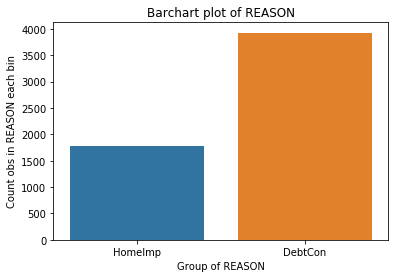

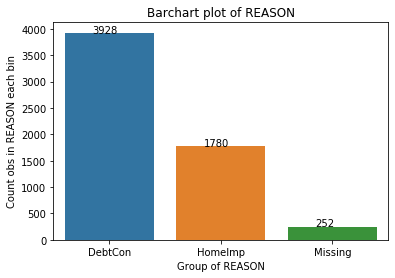

In [ ]:
 # Biểu đồ barchart
def _plot_barchart(x, fieldname, figsize = (6, 4)):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)
  plt.figure(figsize = figsize)
  sns.countplot(x)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

# Biểu đồ trên sẽ bị missing giá trị NA

_plot_barchart(dataset['REASON'], 'REASON')

# Biểu đồ barchart có thê label ở trên

def _plot_barchart2(x, fieldname, figsize = (6, 4)):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  plt.figure(figsize = figsize)
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()

_plot_barchart2(dataset['REASON'], 'REASON')

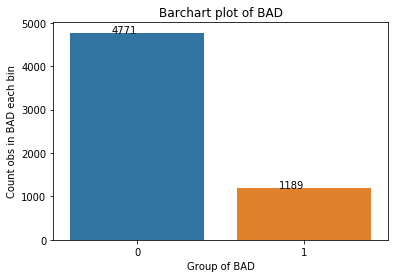

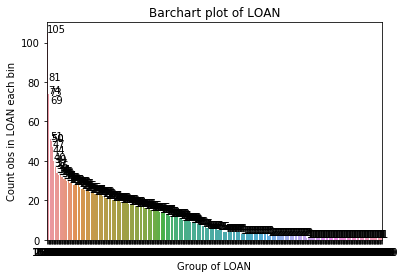

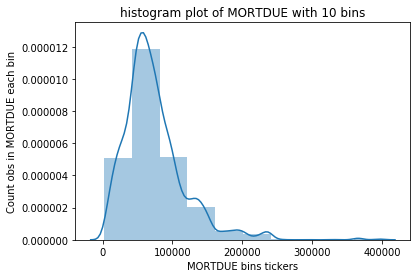

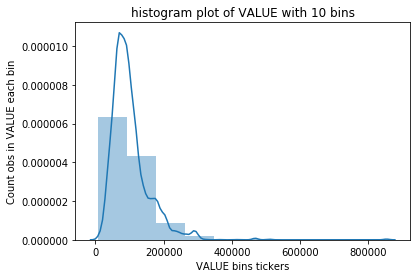

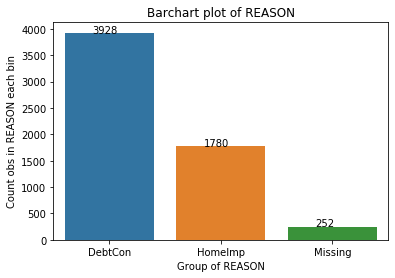

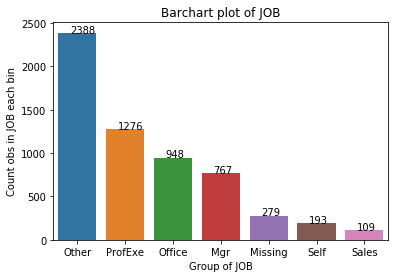

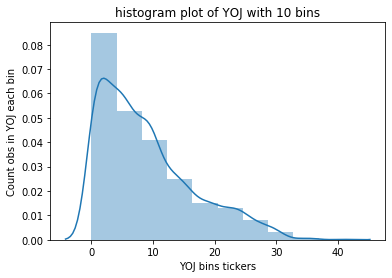

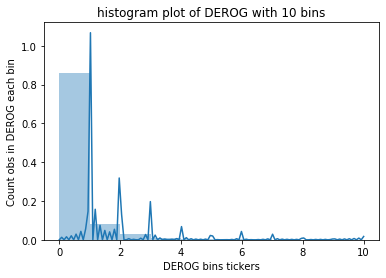

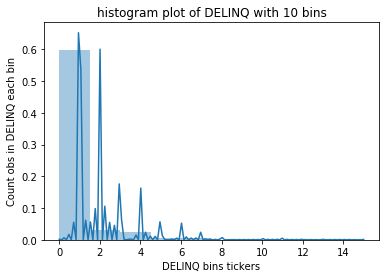

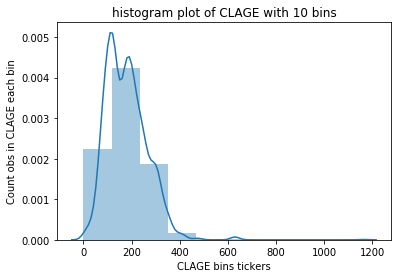

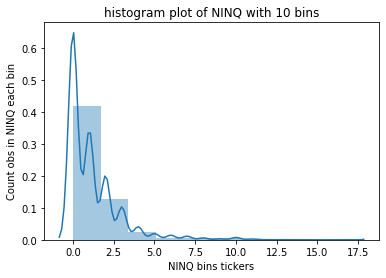

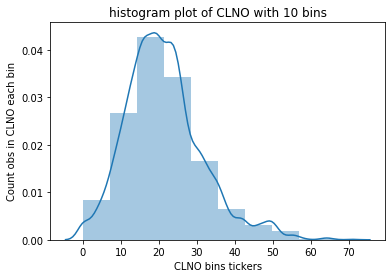

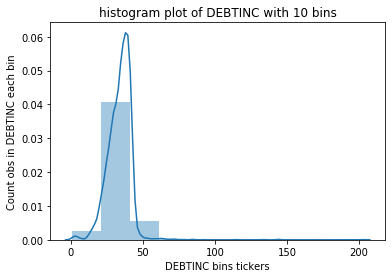

In [ ]:
# Tạo vòng for visualize các biểu đồ
for col, dtype in zip(dataset.columns, dataset.dtypes):
  if dtype == 'float64':
    _plot_hist(dataset[col], col)
  else:
    _plot_barchart2(dataset[col], col)

In [ ]:
# Sắp xếp các đồ thị đẹp mắt hơn
# chúng ta có tổng cộng 12 biến nên có thể chia chúng vào 4 dòng 3 cột
# Điều chỉnh lại các đồ thị sao cho chúng trả ra kết quả là các pyplot object

# Biểu đồ histogram
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins tickers'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax

In [ ]:
data

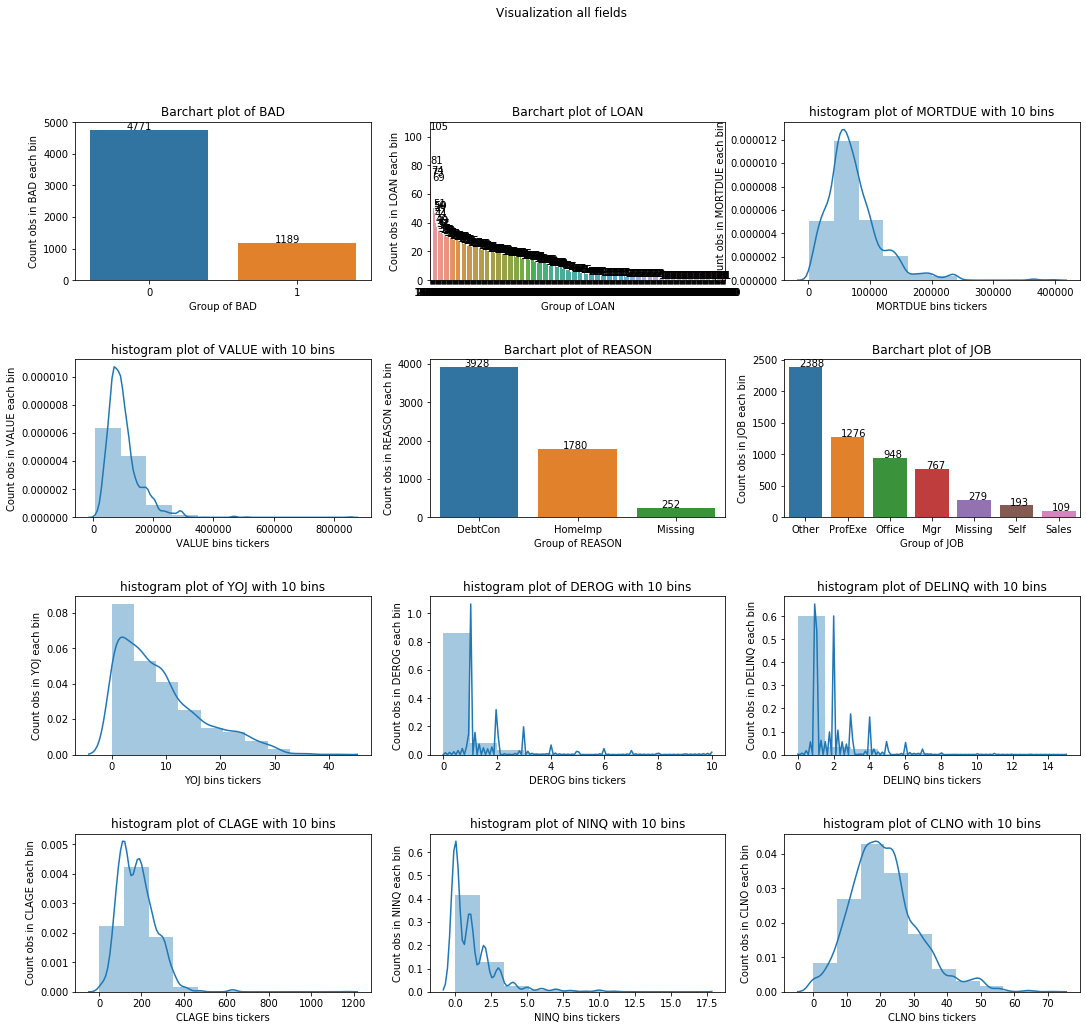

In [ ]:
# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(dataset.columns, dataset.dtypes.values)):
  if i <= 11:
    ax_i = fig.add_subplot(4, 3, i+1)
    if dtype in ['float64','int32']:
      ax_i = _plot_hist_subplot(dataset[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(dataset[fieldname], fieldname=fieldname)
      
fig.suptitle('Visualization all fields')
plt.show()

**Câu 7:** Fill các giá trị NA của các biến category bằng 'Missing' và NA của các biến liên tục bằng giá trị median.

_gợi ý: Dùng module Imputer của sklearn và dataframe.fillna('Missing')_


In [ ]:
# https://scikit-learn.org/stable/modules/impute.html
# Xử lý NaN values với biến liên tục
# Cách 1:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset.select_dtypes('float64'))
X_float = imp.transform(dataset.select_dtypes('float64'))

In [ ]:
dataset2 = dataset.copy()

In [ ]:
# Cách 2:
# medians = dataset.select_dtypes('float64').apply(np.nanmedian, axis = 0)
means = dataset.select_dtypes('float64').apply(np.mean, axis = 0)
cols_float = list(dataset.select_dtypes('float64').columns)
dataset[cols_float] = dataset[cols_float].fillna(means)

In [ ]:
# Xử lý NaN values với biến category 
cols_object = list(dataset.select_dtypes('object').columns)
dataset[cols_object] = dataset.select_dtypes('object').fillna('Missing')

**Câu 8:** Chuẩn hóa các biến liên tục bằng phương pháp standard normal scaling và encoding các biến category bằng one hot label

_gợi ý: Dùng các module sklearn.preprocessing.StandardScaler() và hàm sklearn.preprocessing.LabelBinarizer()_

In [ ]:
print(dataset.shape)
dataset.head()

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,Missing,Missing,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [ ]:
df_float = dataset.select_dtypes('float64')
df_cate = dataset.select_dtypes('object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler

scaler_float = StandardScaler()
# scaler_float = MinMaxScaler()
scaler_float.fit(df_float)
X_float = scaler_float.transform(df_float)
print(X_float.shape)

(5960, 9)


In [ ]:
cat_groups = dict()
scaler_cats = []
X_cate = None
for i, col in enumerate(cols_object):
  scaler_cat = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
  scaler_cat.fit(df_cate[col])
  cat_groups[col] = scaler_cat.classes_
  scaler_cats.append(scaler_cats)
  X_trans = scaler_cat.transform(df_cate[col])
  if i == 0:
    X_cate = X_trans
  else:
    X_cate = np.concatenate([X_cate, X_trans], axis = 1)

print(X_cate.shape)

(5960, 10)


In [ ]:
X = np.concatenate([X_float, X_cate], axis = 1)

In [ ]:
# Cách 2: Sử dụng hàm pd.dummies()
dataset2 = dataset.copy()

df_float = dataset2.select_dtypes('float64')
cols_float = list(df_float.columns)
scaler_float = StandardScaler()
# scaler_float = MinMaxScaler()
scaler_float.fit(df_float)
X_float = scaler_float.transform(df_float)
dataset2[cols_float] = X_float

In [ ]:
# Tạo dummies values
dataset2 = pd.get_dummies(dataset2)
dataset2.dtypes

BAD                 int64
LOAN                int64
MORTDUE           float64
VALUE             float64
YOJ               float64
DEROG             float64
DELINQ            float64
CLAGE             float64
NINQ              float64
CLNO              float64
DEBTINC           float64
REASON_DebtCon      uint8
REASON_HomeImp      uint8
REASON_Missing      uint8
JOB_Mgr             uint8
JOB_Missing         uint8
JOB_Office          uint8
JOB_Other           uint8
JOB_ProfExe         uint8
JOB_Sales           uint8
JOB_Self            uint8
dtype: object

In [ ]:
y = dataset2.pop('BAD')
y = y.values

In [ ]:
X = dataset2.values

In [ ]:
print(X.shape)
print(y.shape)

(5960, 20)
(5960,)


**Câu 9:** Phân chia tập train/test theo tỷ lệ 80%/20% sao cho tỷ lệ của hồ sơ good/bad là bằng nhau trên cả tập train và tập test.

_gợi ý: Dùng hàm train_test_split trong skearn.model_selection với stratify= True_

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, np.arange(y.shape[0]), stratify = y, test_size = 0.2, random_state = 123)

# Xây dựng model logistic regression

**Câu 10:** Xây dựng model logistic regression trên tập huấn luyện.

_gợi ý: dùng sklearn.linear_model.LogisticRegression_

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_reg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = 10000, solver = 'lbfgs')
lg_reg.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lg_reg_l1 = LogisticRegression(penalty = 'l1', fit_intercept = True, C = 10000, solver = 'liblinear')
lg_reg_l1.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**Câu 11:** Dự báo xác suất và dự báo nhãn của mỗi hợp đồng trên tập test

_gợi ý: dự báo xác suất dùng hàm predict_proba() và nhãn dùng hàm predict() của model_

In [ ]:
# Dự báo xác suất
y_prob_pred = lg_reg.predict_proba(X_test)
y_prob_pred.shape

(1192, 2)

In [ ]:
# Dự báo xác suất theo l1
y_prob_pred_l1 = lg_reg_l1.predict_proba(X_test)
y_prob_pred_l1.shape

(1192, 2)

In [ ]:
# Dự báo nhãn
y_class_pred = lg_reg.predict(X_test)
y_class_pred.shape

(1192,)

In [ ]:
# Dự báo nhãn theo l1
y_class_pred_l1 = lg_reg_l1.predict(X_test)
y_class_pred_l1.shape

(1192,)

**Câu 12:** Đánh giá độ chính xác của mô hình trên tập test.

_gợi ý: Dùng các module accuracy_score, precision, recal của sklearn.metrics_

In [ ]:
from sklearn.metrics import accuracy_score
# Đo lường độ chính xác của mô hình
accuracy_score(y_class_pred, y_test)

0.8355704697986577

In [ ]:
accuracy_score(y_class_pred_l1, y_test)

0.8414429530201343

In [ ]:
# Tính các chỉ số precision và recall
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
prec, rec, thres = precision_recall_curve(y_test, y_prob_pred[:, 1])
print(prec.shape)
print(rec.shape)
print(thres.shape)
print('precision_score:', precision_score(y_test, y_class_pred))
print('recall_score:', recall_score(y_test, y_class_pred))

(1162,)
(1162,)
(1161,)
precision_score: 0.6693548387096774
recall_score: 0.3487394957983193


**Câu 13:** Viết các hàm số vẽ đường cong ROC curve và precision, recal curve

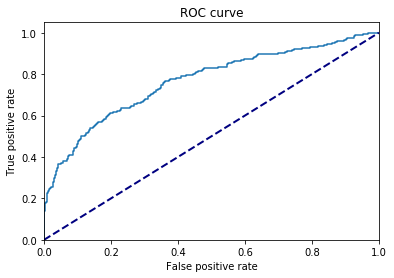

In [ ]:
import matplotlib.pyplot as plt

# Hàm vẽ ROC curve
def _plot_ROC(fpr, tpr):
  plt.plot(fpr, tpr)
  # (Tỷ lệ hợp đồng thông thường bị dự báo sai thành nợ xấu)
  plt.xlabel('False positive rate')
  # (Tỷ lệ hợp đồng nợ xấu được dự báo đúng nợ xấu)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_prob_pred[:, 1])

_plot_ROC(tpr = tpr, fpr = fpr)

In [ ]:
# Hàm vẽ đường precision và recal
def _plot_precision_recal(prec, rec, thres):
  plt.plot(thres, prec[:-1], label = 'precision')
  plt.plot(thres, rec[:-1], label = 'recal')
  plt.xlabel('Threshold')
  plt.ylabel('Rate')
  plt.title('Precision vs Recal curve')
  plt.legend()
  plt.show()

_plot_precision_recal(prec, rec, thres = thres)

**Câu 14:** Viết hàm thực hiện cross validation trên training K-Fold = 5

_gợi ý: dùng module KFold trong sklearn.model_selection_

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

def _cross_validation(model_init, X_train, y_train, n_splits = 5):
  models = []
  accuracies = []
  kfold = StratifiedKFold(n_splits = n_splits, shuffle = True ,random_state = 123)
  for i, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
    X_train_i, X_val_i = X_train[train_idx, :], X_train[valid_idx, :]
    y_train_i, y_val_i = y_train[train_idx], y_train[valid_idx]
    # Huấn luyện model trên lượt split thứ i
    print('Lượt Fold thứ {}'.format(i))
    model_i = model_init
    model_i.fit(X_train_i, y_train_i)
    model = dict()
    model['kfold'] = i
    model['model'] = model_i
    models.append(model)
    accuracy = dict()
    # Đánh giá accuracy model tại lượt split thứ i
    y_train_class_pred_i = model_i.predict(X_train_i)
    y_val_class_pred_i = model_i.predict(X_val_i)
    acc_train_i = accuracy_score(y_train_class_pred_i, y_train_i)
    acc_val_i = accuracy_score(y_val_class_pred_i, y_val_i)
    accuracy['kfold'] = i
    accuracy['acc_train'] = acc_train_i
    accuracy['acc_val'] = acc_val_i
    accuracies.append(accuracy)
    print('At {} Fold, Accuracy on train: {}, on validation: {} \n'.format(i, acc_train_i, acc_val_i))
    print('===================================================================================\n')
  return models, accuracies

models, accuracies = _cross_validation(model_init = LogisticRegression(penalty = 'l2', fit_intercept = True, C = 10000, solver = 'lbfgs'),
                                       X_train = X_train, 
                                       y_train = y_train,
                                       n_splits = 5)

Lượt Fold thứ 0
At 0 Fold, Accuracy on train: 0.8329399423026488, on validation: 0.8387434554973822 


Lượt Fold thứ 1
At 1 Fold, Accuracy on train: 0.8303618248557945, on validation: 0.8280922431865828 


Lượt Fold thứ 2
At 2 Fold, Accuracy on train: 0.8346002621231979, on validation: 0.8247639034627492 


Lượt Fold thứ 3
At 3 Fold, Accuracy on train: 0.8335517693315858, on validation: 0.825813221406086 


Lượt Fold thứ 4
At 4 Fold, Accuracy on train: 0.8314547837483617, on validation: 0.8405036726128017 




In [ ]:
models

[{'kfold': 0,
  'model': LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)},
 {'kfold': 1,
  'model': LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)},
 {'kfold': 2,
  'model': LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_sta

In [ ]:
accuracies

[{'acc_train': 0.8329399423026488, 'acc_val': 0.8387434554973822, 'kfold': 0},
 {'acc_train': 0.8303618248557945, 'acc_val': 0.8280922431865828, 'kfold': 1},
 {'acc_train': 0.8346002621231979, 'acc_val': 0.8247639034627492, 'kfold': 2},
 {'acc_train': 0.8335517693315858, 'acc_val': 0.825813221406086, 'kfold': 3},
 {'acc_train': 0.8314547837483617, 'acc_val': 0.8405036726128017, 'kfold': 4}]

In [ ]:
# Cách 2: Dùng hàm cross_val_score của sklearn.model_selection
from sklearn.model_selection import cross_val_score

lreg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = 10000, solver = 'lbfgs')
scores_lreg = cross_val_score(lreg, X_train, y_train, cv=5)
print(scores_lreg)
print('scores_lreg.mean:',scores_lreg.mean())

[0.83141361 0.8312369  0.83420776 0.83525708 0.83315845]
scores_lreg.mean: 0.833054760939684


Nhược điểm của phương pháp này là chỉ biết kết quả trên tập validation (1/5 dữ liệu còn lại) mà ko biết kết quả trên tập train.

**Câu 15:** Huấn luyện mô hình trên tập train với các phương pháp `kNN, SVM, MLP, Random Forest`. Chúng ta nên lựa chọn lớp mô hình nào cho bộ dữ liệu này.

_gợi ý: sử dụng module sklearn để khởi tạo và huấn luyện mô hình. Thực hiện cross validation để tìm ra model có trung bình accuracy trên tập test là lớn nhất_

In [ ]:
print('scores_lreg.mean:',scores_lreg.mean())
#kNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
scores_kNN = cross_val_score(neigh, X_train, y_train, cv=5)
print('scores_kNN.mean:',scores_kNN.mean())

#SVM
from sklearn.svm import SVC
svm = SVC()
# svm.fit(X_train, y_train)
scores_svm = cross_val_score(svm, X_train, y_train, cv=5)
print('scores_svm.mean:',scores_svm.mean())

#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',alpha=1e-5, activation='relu',hidden_layer_sizes=(200, 100, 50),random_state=1)
# mlp.fit(X_train,y_train)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5)
print('scores_mlp.mean:',scores_mlp.mean())

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=200,max_depth=5,random_state=0)
# rforest.fit(X_train, y_train)
scores_rforest = cross_val_score(rforest, X_train, y_train, cv=5)
print('scores_rforest.mean:',scores_rforest.mean())

scores = np.array([scores_lreg.mean(), scores_kNN.mean(), scores_svm.mean(), scores_mlp.mean(),scores_rforest.mean()])
index = np.array(['scores_logisticregression.mean', 'scores_kNN.mean', 'scores_svm.mean', 'scores_mlp.mean','scores_rforest.mean'])

print("max score:",index[np.argmax(scores)],":",scores.max())

scores_lreg.mean: 0.833054760939684
scores_kNN.mean: 0.8143900917628869
scores_svm.mean: 0.8148080595385399
scores_mlp.mean: 0.8005454693442973
scores_rforest.mean: 0.8471059485870718
max score: scores_rforest.mean : 0.8471059485870718


In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs',alpha=1e-5, activation='logistic',hidden_layer_sizes=(200, 100, 50),random_state=None)
mlp.fit(X_train,y_train)
scores_mlp = cross_val_score(mlp, X_train, y_train, cv=5)
print('scores_mlp.mean:',scores_mlp.mean())

scores_mlp.mean: 0.8089400128909918


**Câu 16:** Sử dụng các kĩ thuật feature engineering để nâng accuracy của model từ 85% lên 90%.

_gợi ý: Sử dụng kĩ thuật poly norminal để khởi tạo các biến bậc cao và sử dụng correlation để tìm ra list 15 biến trong số đó có tương quan cao nhất với biến mục tiêu để xây dựng phương trình dự báo._

**Các thay đổi:**
- imputer missing value = mean
- feature scale trên chỉ tập train và sau đó apply scale trên tập test.
- Thử cả 2 phương án MinMaxScaler và StandardScaler.
- Áp dụng Polynomial Features.
- tunning grid search với các tham số.


In [ ]:
dataset3 = pd.get_dummies(dataset)
print(dataset3.shape)

(5960, 21)


In [ ]:
from sklearn.preprocessing import Imputer

imput = Imputer(strategy = 'mean')
# lệnh fit để thực hiện training input (trong trường hợp này là tính trung bình)
imput.fit(dataset3)
# Biến đổi trên dữ liệu bằng lện transform
data_np = imput.transform(dataset3)
data_np[:1, :]

array([[1.00000000e+00, 1.10000000e+03, 2.58600000e+04, 3.90250000e+04,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 9.43666667e+01,
        1.00000000e+00, 9.00000000e+00, 3.48182618e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [ ]:
X = data_np[:,1:]
y = dataset.iloc[:,0]
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5960, 20)
y shape: (5960,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (4768, 20)
X test shape: (1192, 20)
y train shape: (4768,)
y test shape: (1192,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scale = MinMaxScaler(feature_range = (-1, 1))
scale = StandardScaler()
scale.fit(X_train)

# Transform X_train and X_test
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

feature_poly = PolynomialFeatures(degree = 4)
feature_poly.fit(X_train)
X_train_poly = feature_poly.transform(X_train)
X_test_poly = feature_poly.transform(X_test)
print(X_train_poly.shape)
print(X_test_poly.shape)

(4768, 10626)
(1192, 10626)


In [ ]:
features_name = feature_poly.get_feature_names(input_features = columns)
print(len(features_name))

10626


In [ ]:
# Tính correlation
def _correlation():
  correlation = []
  for i, col in enumerate(features_name):
    corr = np.corrcoef(X_train_poly[:, i], y_train)[0, 1]
    correlation.append(corr)
  df_corr = pd.DataFrame({'Column':features_name, 'Correlation':correlation, 'Abs_Correlation':np.abs(correlation)}).reset_index()
  df_corr = df_corr.sort_values('Abs_Correlation', ascending = False)
  return df_corr

df_corr = _correlation()

In [ ]:
# Huấn luyện mô hình
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

for i in np.arange(100, X_train_poly.shape[1], 500):
  # Lấy ra i biến tương quan cao nhất với biến mục tiêu
  indexes = list(df_corr.iloc[:i, :]['index'])
  X_train_extract = X_train_poly[:, indexes]
  X_test_extract = X_test_poly[:, indexes]
  logit_reg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = 10000, solver = 'lbfgs')
  scores_logit = cross_val_score(logit_reg, X_train_extract, y_train, cv=5)
  print('{} features - scores_logit.mean: {}'.format(i, scores_logit.mean()))

100 features - scores_logit.mean: 0.8452154191908685
600 features - scores_logit.mean: 0.8762541285501839
1100 features - scores_logit.mean: 0.8810759337886793
1600 features - scores_logit.mean: 0.8796128254393544
2100 features - scores_logit.mean: 0.8850622429807664
2600 features - scores_logit.mean: 0.8894654223380046
3100 features - scores_logit.mean: 0.8917739208919517
3600 features - scores_logit.mean: 0.8903075132613635
4100 features - scores_logit.mean: 0.8942916244682649
4600 features - scores_logit.mean: 0.8955492665813848
5100 features - scores_logit.mean: 0.8932429664733202
5600 features - scores_logit.mean: 0.8942905259363692
6100 features - scores_logit.mean: 0.8999535449312157
6600 features - scores_logit.mean: 0.8972277371679169
7100 features - scores_logit.mean: 0.899118267024817
7600 features - scores_logit.mean: 0.9018440743274191
8100 features - scores_logit.mean: 0.9087642968518814
8600 features - scores_logit.mean: 0.9043617792858232
9100 features - scores_logit.me

In [ ]:
# Huấn luyện mô hình
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rforest = RandomForestClassifier(n_estimators=400,max_depth=10,random_state=0)
# rforest.fit(X_train, y_train)
scores_rforest = cross_val_score(rforest, X_train_poly, y_train, cv=5)
print('scores_rforest.mean:',scores_rforest.mean())

scores_rforest.mean: 0.9037363612825162
